In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


Load Data

In [ ]:
# read data file
df=pd.read_csv('/content/drive/MyDrive/Degree/Intro to Data Science/Assignment Test/waterQuality1.csv')
df.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,0.007,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,0.005,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,0.002,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,0.830,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


EDA

In [ ]:
df.shape

(7999, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
# Find number of NULL values (eventually if have need remove in preprocessing)
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
#check is there any duplicates
check_duplicate = df.duplicated().sum()
check_duplicate

0

Unique values
 ['1' '0' '#NUM!']
Unique Value Counts
 0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64


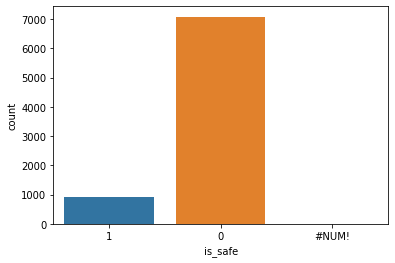

In [ ]:
# For checking of Y value data distribution (for check is the data balance)
print('Unique values\n',df['is_safe'].unique())
print('Unique Value Counts\n',df['is_safe'].value_counts())
# Above codes will help to give us information about it's unique values and count of each value.

sns.countplot(data=df,x='is_safe')

Data Preprocessing

In [ ]:
# Remove rows which is has unwanted values
df = df[df.is_safe != "#NUM!" ]
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [ ]:

# convert is_safe to float datatype
df['is_safe'] = df['is_safe'].astype(int)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


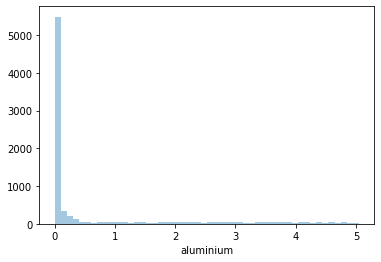

In [ ]:
sns.distplot(df['aluminium'], kde=False)


In [ ]:
sns.scatterplot(x="Age", y="Fare", hue = 'Pclass', data=train_data)


Correlation

In [ ]:
df.corr()


,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,-0.071040,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
arsenic,0.225725,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,0.011596,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,-0.002429,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,0.021255,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,0.003432,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,0.002193,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,0.006183,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,0.018261,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,0.618535,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077
viruses,-0.071040,0.011596,-0.002429,0.021255,0.003432,0.002193,0.006183,0.018261,0.618535,1.000000,0.017886,-0.044621,-0.091364,0.011728,0.002965,-0.019955,-0.035013,0.011680,0.058473,-0.097040


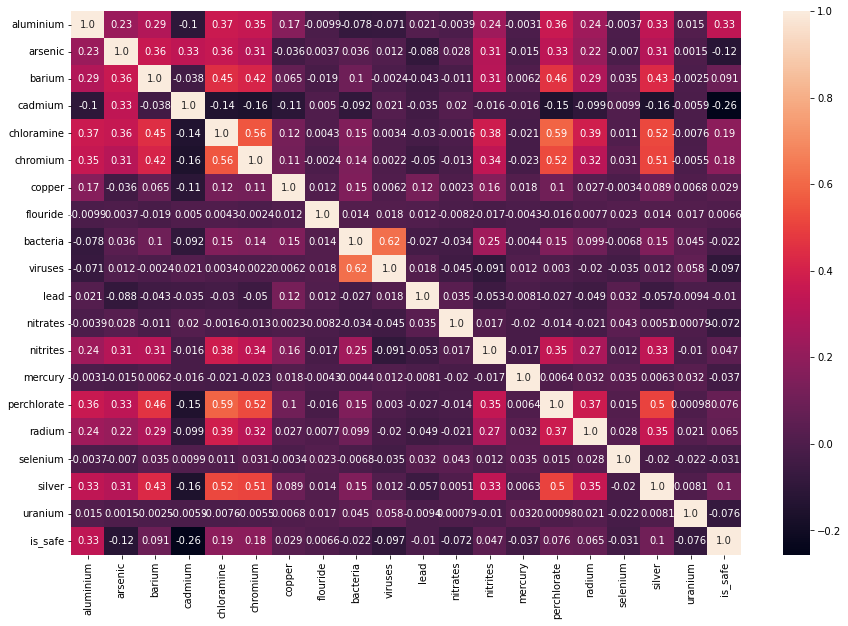

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

Find Correlation with SelectKbest

In [ ]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(df.drop('is_safe',axis=1),df['is_safe'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(df.drop('is_safe',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
0,aluminium,1003.575959
4,cadmium,560.795707
5,chloramine,288.723524
6,chromium,274.818978
2,arsenic,123.534096
18,silver,85.403115
10,viruses,75.992837
3,barium,66.541902
15,perchlorate,46.116981
19,uranium,45.974303


In [ ]:
# Get scores that are above 50
best_features=fscores[fscores['Score']>100]['Attribute']
print(best_features)

0     aluminium
2       arsenic
4       cadmium
5    chloramine
6      chromium
Name: Attribute, dtype: object


In [ ]:
new = df[['aluminium', 'arsenic', 'cadmium','chloramine', 'chromium','is_safe']].copy()
new

,aluminium,arsenic,cadmium,chloramine,chromium,is_safe
0,1.65,0.04,0.007,0.35,0.83,1
1,2.32,0.01,0.002,5.28,0.68,1
2,1.01,0.04,0.008,4.24,0.53,0
3,1.36,0.04,0.001,7.23,0.03,1
4,0.92,0.03,0.006,2.67,0.69,1
...,...,...,...,...,...,...
7994,0.05,0.00,0.040,0.10,0.03,1
7995,0.05,0.02,0.010,0.45,0.02,1
7996,0.09,0.00,0.030,0.05,0.05,1
7997,0.01,0.01,0.000,2.00,0.00,1


In [ ]:
new.to_csv('/content/drive/MyDrive/Degree/Intro to Data Science/Assignment Test/water_new.csv') 

Load with New manual data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Degree/Intro to Data Science/Assignment Test/latest_water1.csv')
print('Unique Value Counts\n',data['is_safe'].value_counts())
data

Unique Value Counts
 0    7084
1    6912
Name: is_safe, dtype: int64


,aluminium,arsenic,cadmium,chloramine,chromium,is_safe
0,1.65,0.040,0.007,0.35,0.83,1
1,2.32,0.010,0.002,5.28,0.68,1
2,1.01,0.040,0.008,4.24,0.53,0
3,1.36,0.040,0.001,7.23,0.03,1
4,0.92,0.030,0.006,2.67,0.69,1
...,...,...,...,...,...,...
13991,1.93,0.004,0.002,2.01,0.08,1
13992,1.86,0.020,0.003,2.67,0.03,1
13993,0.69,0.018,0.002,3.60,0.03,1
13994,1.43,0.015,0.005,3.86,0.05,1


In [ ]:
# Splitting X and Y
X = data.drop(['is_safe'], 1)
y = data['is_safe']

#Train_Test Split
train_x,test_x,train_y,test_y=train_test_split(X,y,random_state=42,test_size=0.20)
# Shape of data
train_x.shape,test_x.shape,train_y.shape,test_y.shape
train_x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,aluminium,arsenic,cadmium,chloramine,chromium
10402,2.73,0.004,0.002,3.08,0.02
3710,0.01,0.360,0.120,8.11,0.07
3571,0.05,0.290,0.120,1.99,0.32
6925,0.09,0.070,0.090,0.28,0.07
6223,0.01,0.020,0.020,0.05,0.06
...,...,...,...,...,...
5191,0.04,0.020,0.010,0.02,0.01
13418,2.37,0.002,0.004,3.72,0.09
5390,0.07,0.030,0.000,0.26,0.07
860,2.16,0.010,0.009,1.02,0.29


Train model with different algorithm 

In [ ]:

clf_gnb = GaussianNB()
clf_tree= DecisionTreeClassifier() 
clf_knn = KNeighborsClassifier()
# now, create a list with the objects 
models= [clf_gnb,clf_tree,clf_knn]
for x in models:
    x.fit(train_x, train_y) # fit the model
    y_pred= x.predict(test_x) # then predict on the test set 
    accuracy= accuracy_score(test_y, y_pred) # this gives us how often the algorithm predicted correctly
    print(f"The accuracy of model {type(x).__name__} is {accuracy * 100}")
    print("\n")

for model in models:
    model.fit(train_x, train_y) # fit the model
    y_pred= model.predict(test_x) # then predict on the test set
    accuracy= accuracy_score(test_y, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(test_y, y_pred) # with the report, we have a bigger picture, with precision and recall for each class

    #print(f"The accuracy of model {type(model).__name__} is {accuracy * 100}")
    print(f"Model: {type(model).__name__}")

    print(clf_report)
    print("\n")

The accuracy of model GaussianNB is 85.0


The accuracy of model DecisionTreeClassifier is 92.53571428571429


The accuracy of model KNeighborsClassifier is 93.10714285714286


Model: GaussianNB
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1410
           1       0.80      0.93      0.86      1390

    accuracy                           0.85      2800
   macro avg       0.86      0.85      0.85      2800
weighted avg       0.86      0.85      0.85      2800



Model: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1410
           1       0.92      0.92      0.92      1390

    accuracy                           0.92      2800
   macro avg       0.92      0.92      0.92      2800
weighted avg       0.92      0.92      0.92      2800



Model: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.93      0.94 

In [ ]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 5.4 MB/s 
     |████████████████████████████████| 14.8 MB 44.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


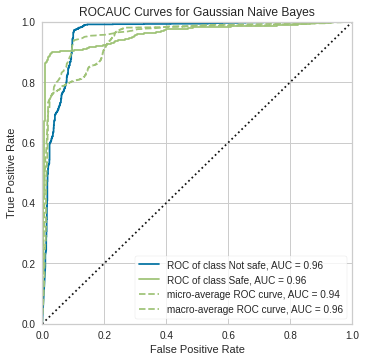

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


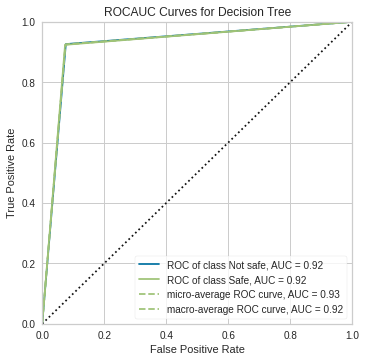

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


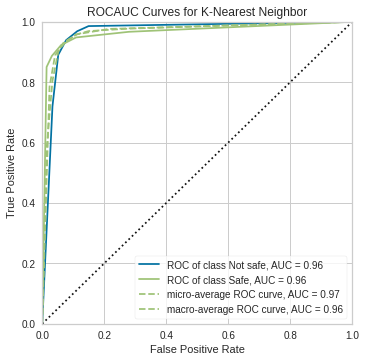

In [ ]:
# ROC-AUC curve
from yellowbrick.classifier import ROCAUC

# ROC curve for Gaussian Naive Bayes
visualizer = ROCAUC(clf_gnb, size=(400, 400), title = "ROCAUC Curves for Gaussian Naive Bayes",classes=["Not safe", "Safe"])
visualizer.fit(train_x, train_y)
visualizer.score(test_x, test_y)
visualizer.show()

# ROC curve for Dec Tree
visualizer = ROCAUC(clf_tree, size=(400, 400), title = "ROCAUC Curves for Decision Tree",classes=["Not safe", "Safe"])
visualizer.fit(train_x, train_y)
visualizer.score(test_x, test_y)
visualizer.show()

# ROC curve for KNN
visualizer = ROCAUC(clf_knn, size=(400, 400), title = "ROCAUC Curves for K-Nearest Neighbor",classes=["Not safe", "Safe"])
visualizer.fit(train_x, train_y)
visualizer.score(test_x, test_y)
visualizer.show()

Testing with real input data

In [ ]:
#aluminium	arsenic	cadmium	chloramine	chromium
#	aluminium	arsenic	cadmium	chloramine	chromium
#aluminium - dangerous if greater than 2.8
#arsenic - dangerous if greater than 0.01
# cadmium - dangerous if greater than 0.005
# chloramine - dangerous if greater than 4
# chromium - dangerous if greater than 0.1
input_data = [[1.1,0.001,0.004,2.9,0.01]]


# changing the input_data to numpy array
#input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
#input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = clf_knn.predict(input_data)
print(prediction)

if (prediction == 0):
      print('Not Safe')
else:
      print('Safe')

[1]
Safe


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:

!pip install lime

     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=45d779c4a61d0049f578a7cfd55174f61736470a1a9e313611c02cd3555ceacd
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


LIME Explainer

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(train_x),
    feature_names=train_x.columns,
    class_names=['Not Safe', 'Safe'],
    mode='classification'
)


lst = ['aluminium','arsenic','cadmium','chloramine','chromium']
ss = pd.Series(input_data[0], lst)
ss
exp = explainer.explain_instance(
    data_row=ss, 
    predict_fn=clf_knn.predict_proba
)

exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Export to pickle

In [ ]:
import pickle
with open("/content/drive/MyDrive/Degree/Intro to Data Science/Assignment Test/tree3.pkl", "wb") as f:
    pickle.dump(clf_tree,f)

In [ ]:
import pickle
# load model
with open('/content/drive/MyDrive/Degree/Intro to Data Science/Assignment Test/tree3.pkl', 'rb') as f:
    loaded_classifier = pickle.load(f)

Testing Model with Pickle file

In [ ]:
#aluminium	arsenic	cadmium	chloramine	chromium
#	aluminium	arsenic	cadmium	chloramine	chromium
#aluminium - dangerous if greater than 2.8
#arsenic - dangerous if greater than 0.01
# cadmium - dangerous if greater than 0.005
# chloramine - dangerous if greater than 4
# chromium - dangerous if greater than 0.1
test_data = [[2.1,	0.001,	0.001,	3, 0.01]]

pickle_predict = loaded_classifier.predict(test_data)
print(pickle_predict)
if (pickle_predict == 0):
      print('Not Safe')
else:
      print('Safe')

[0]
Not Safe


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
